*****Email_classifier.ipynb*****  

- This is the main file, which takes all input data as a CSV file and performs the model training evaluation and outputs. The trained models and training history files are saved in the "Data/savedmodels" directory for easy prediction later with the new dataset.

In [2]:
# Import Required Libraries
import csv
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.models import Sequential
import keras
import tensorflow_hub as hub
import tensorflow_text as text
from keras.layers import Embedding, Dense
from keras.losses import BinaryCrossentropy
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences



## Email Classification

In [3]:
# Setup your Data Directory path

# uncomment below two line if you are using google colab

# drive.mount('/content/drive/')
# dirpath = "/content/drive/MyDrive/"Your path to directory"/Data/"

# uncomment below line and comment above line if you are using jupyter notebook
dirpath = "Data/"

In [4]:
# Load the data set as required
df = pd.read_csv(f"{dirpath}Training_Data/emails_cleaned_final.csv")
df.head(10)

,X,y
0,whuppin hands california gov gray davis agree ...,0
1,expert subscriber view information legal,1
2,remain large frustration development datum war...,0
3,involve early termination certain structured f...,0
4,godbole panel suggestion unacceptable enron gi...,0
5,kitchen louise,0
6,log paypal account,1
7,h colegio militar 1013,1
8,thank,0
9,joseph silha,0


HAM Mail Count: 403551
SPAM Mail Count: 263650


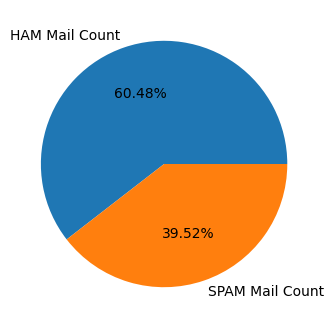

In [5]:
# # Count how many entries exist for each label
HAM_Count = df.value_counts('y')[0]
SPAM_Count = df.value_counts('y')[1]
print(f'HAM Mail Count: {HAM_Count}')
print(f'SPAM Mail Count: {SPAM_Count}')

# Creating dataset
Mails = ['HAM Mail Count', 'SPAM Mail Count']
data = [HAM_Count, SPAM_Count]

# Creating plot
fig = plt.figure(figsize =(4,4))
plt.pie(data, autopct='%1.2f%%', labels = Mails)
# Print plot ham and spam mail count
plt.show()


In [10]:
# Assign X and Y for panda series
X = df['X']
Y = LabelEncoder().fit_transform(df['y'])
df

,X,y
0,whuppin hands california gov gray davis agree ...,0
1,expert subscriber view information legal,1
2,remain large frustration development datum war...,0
3,involve early termination certain structured f...,0
4,godbole panel suggestion unacceptable enron gi...,0
...,...,...
667196,instruction,1
667197,shirley crenshaw hou ect ect vanessa carranza ...,0
667198,adapter,1
667199,send monday april 30 2001 8 52,0


In [7]:
# Split data into train and test 40% test and 60% train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.4, random_state=42)

In [8]:
#Feature extraction with TfidfVectorizer
# Initialize a TfidfVectorizer
feature_extraction = TfidfVectorizer(analyzer='word',max_df=1.0,lowercase=True,max_features=20000)

# preprocess dataset
x_train_features =feature_extraction.fit_transform((X_train).values.astype('str'))
x_test_features = feature_extraction.transform((X_test).values.astype('str'))

In [11]:
# #Printing shape of the splited dataset
print(f"X_Train Shapes = {x_train_features.shape}")
print(f"X_Test Shapes  = {x_test_features.shape}")

X_Train Shapes = (400320, 20000)
X_Test Shapes  = (266881, 20000)


### AI Generated Mail dataset Process for Testing

In [12]:
# Load in the cleaned CSV data into a pandas DataFrame
df_Ai_mails = pd.read_csv(f"{dirpath}Training_Data/AI_emails_cleaned_final.csv")
df_Ai_mails.head(10)

,XAI,YAI
0,hi William,1
1,I hope email find well I come profile notice e...,1
2,at XYZEdu course call Practical Windows Forens...,1
3,the course provide insight realworld attack pa...,1
4,to appeal offer 20 discount 100 student this g...,1
5,if want optout email unsubscribe here httpsxyz...,1
6,thank consider opportunity I look forward posi...,1
7,kind regard,1
8,Greg,1
9,sale Rep XYZEdu,1


In [13]:
# Assign X and Y for panda series
X_AI = df_Ai_mails['XAI']
Y_AI = df_Ai_mails['YAI']


In [14]:
#Feature extraction with TF-IDF vectorizer
XAI_test_features = feature_extraction.transform((X_AI).values.astype('str'))
# Convert Y_AI values as intiger
YAI_test = Y_AI.astype(int)

### Final two extracted datasets for test the accuracy of selected models.

In [15]:
#Printing shape of the splited dataset
print(f"X_Train Shapes = {x_train_features.shape}")
print(f"X_Test Shapes   = {x_test_features.shape}")
print(f"X_Test Shapes AI  = {XAI_test_features.shape}")

X_Train Shapes = (400320, 20000)
X_Test Shapes   = (266881, 20000)
X_Test Shapes AI  = (4320, 20000)


### Multinomial Naive Bayes

In [ ]:
# Train the model and save it to file
model_MLNB = MultinomialNB(force_alpha=True)
model_MLNB.fit(x_train_features,Y_train)
torch.save(model_MLNB, f'{dirpath}savedmodels/model_MLNB')

In [13]:
# Load the saved model and 

model_MLNB = torch.load(f'{dirpath}savedmodels/model_MLNB')

# Prediction On Training Data
prediction_on_trainingData_MLNB = model_MLNB.predict(x_train_features)
Acuracy_on_Training_prediction_MLNB = accuracy_score(Y_train, prediction_on_trainingData_MLNB)

# Print Accuracy on training Data
print(f"Acuracy on Training Data MLNB = {format(Acuracy_on_Training_prediction_MLNB*100, '.2f')} %")

#Prediction On Testing data
prediction_on_testingData_MLNB = model_MLNB.predict(x_test_features)
Acuracy_on_Testing_prediction_MLNB = accuracy_score(Y_test, prediction_on_testingData_MLNB)

# Print Accuracy on testing Data
print(f"Acuracy on Testing Data MLNB = {format(Acuracy_on_Testing_prediction_MLNB*100, '.2f')} %")

#Prediction On AI generated testing Data
prediction_on_testingData_MLNB_AI = model_MLNB.predict(XAI_test_features)
Acuracy_on_Testing_prediction_MLNB_AI = accuracy_score(YAI_test, prediction_on_testingData_MLNB_AI)

# Print Accuracy on AI generated testing Data
print(f"Acuracy on AI Generated Mails with MLNB = {format(Acuracy_on_Testing_prediction_MLNB_AI*100, '.2f')} %")

Acuracy on Training Data MLNB = 86.28 %
Acuracy on Testing Data MLNB = 85.34 %
Acuracy on AI Generated Mails with MLNB = 54.93 %


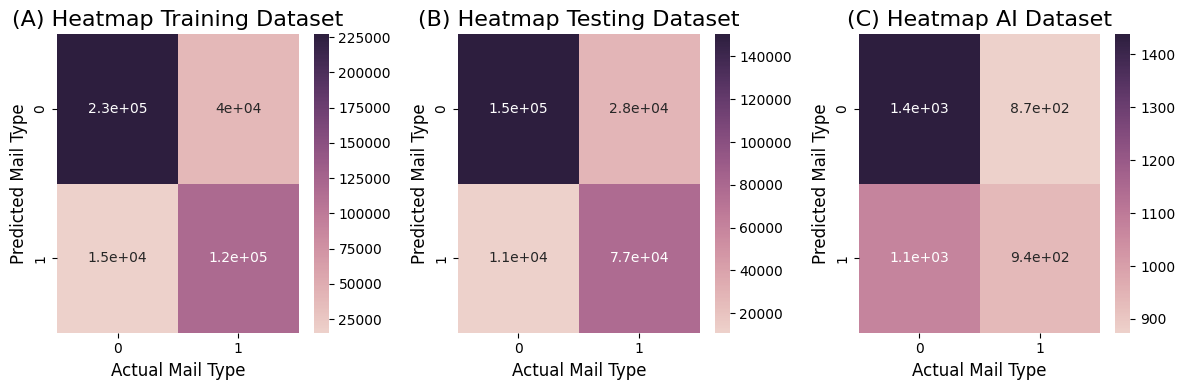

In [16]:
# Plotting Confusion Matrix on heatmaps side by side
cm1 = confusion_matrix(Y_train, prediction_on_trainingData_MLNB)
cm2 = confusion_matrix(Y_test, prediction_on_testingData_MLNB)
cm3 = confusion_matrix(YAI_test, prediction_on_testingData_MLNB_AI)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.heatmap(cm1.transpose(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, ax=axes[0])
axes[0].set_title('(A) Heatmap Training Dataset', fontsize = 16)
axes[0].set_xlabel('Actual Mail Type', fontsize = 12)
axes[0].set_ylabel('Predicted Mail Type', fontsize = 12)

sns.heatmap(cm2.transpose(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, ax=axes[1])
axes[1].set_title('(B) Heatmap Testing Dataset', fontsize = 16)
axes[1].set_xlabel('Actual Mail Type', fontsize = 12)
axes[1].set_ylabel('Predicted Mail Type', fontsize = 12)

sns.heatmap(cm3.transpose(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, ax=axes[2])
axes[2].set_title('(C) Heatmap AI Dataset', fontsize = 16)
axes[2].set_xlabel('Actual Mail Type', fontsize = 12)
axes[2].set_ylabel('Predicted Mail Type', fontsize = 12)

plt.tight_layout()
plt.show()

In [17]:
# Print Classification Report on Ai generated testing data
print(classification_report(YAI_test, prediction_on_testingData_MLNB_AI,zero_division=0))

              precision    recall  f1-score   support

           0       0.62      0.57      0.60      2511
           1       0.47      0.52      0.49      1809

    accuracy                           0.55      4320
   macro avg       0.54      0.54      0.54      4320
weighted avg       0.56      0.55      0.55      4320



### Random Forest Classifire Training with Enron Dataset

In [ ]:
# Train the model and save it to file
model_RF = RandomForestClassifier(max_depth=200)
model_RF.fit(x_train_features,Y_train)
# Save the model to file
torch.save(model_RF, f'{dirpath}savedmodels/model_RF')

In [19]:
# Load saved model and predict on test data
model_RF = torch.load(f'{dirpath}savedmodels/model_RF')

# Prediction On Training Data
prediction_on_trainingData_RF = model_RF.predict(x_train_features)
Acuracy_on_Training_prediction_RF = accuracy_score(Y_train, prediction_on_trainingData_RF)

# Print Accuracy on training Data
print(f"Acuracy on Training Data RF = {format(Acuracy_on_Training_prediction_RF*100, '.2f')} %")

#Prediction On Testing data
prediction_on_testingData_RF = model_RF.predict(x_test_features)
Acuracy_on_Testing_prediction_RF = accuracy_score(Y_test, prediction_on_testingData_RF)

# Print Accuracy on testing Data
print(f"Acuracy on Testing Data RF = {format(Acuracy_on_Testing_prediction_RF*100, '.2f')} %")

prediction_on_testingData_RF_AI = model_RF.predict(XAI_test_features)
Acuracy_on_Testing_prediction_RF_AI = accuracy_score(YAI_test, prediction_on_testingData_RF_AI)

# Print Accuracy on testing Data
print(f"Acuracy on AI Generated Mails RF = {format(Acuracy_on_Testing_prediction_RF_AI*100, '.2f')} %")

Acuracy on Training Data RF = 85.21 %
Acuracy on Testing Data RF = 81.86 %
Acuracy on AI Generated Mails RF = 53.70 %


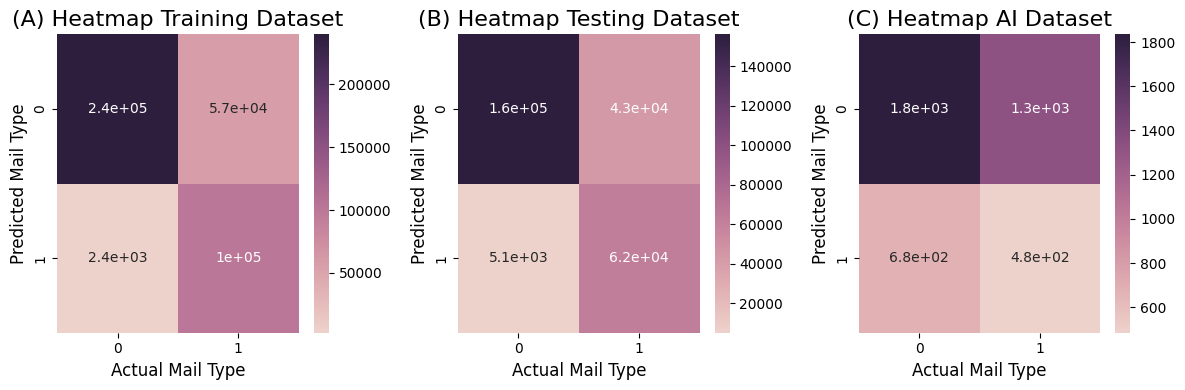

In [20]:
# Plotting Confusion Matrix on heatmaps side by side
cm1 = confusion_matrix(Y_train, prediction_on_trainingData_RF)
cm2 = confusion_matrix(Y_test, prediction_on_testingData_RF)
cm3 = confusion_matrix(YAI_test, prediction_on_testingData_RF_AI)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.heatmap(cm1.transpose(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, ax=axes[0])
axes[0].set_title('(A) Heatmap Training Dataset', fontsize = 16)
axes[0].set_xlabel('Actual Mail Type', fontsize = 12)
axes[0].set_ylabel('Predicted Mail Type', fontsize = 12)

sns.heatmap(cm2.transpose(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, ax=axes[1])
axes[1].set_title('(B) Heatmap Testing Dataset', fontsize = 16)
axes[1].set_xlabel('Actual Mail Type', fontsize = 12)
axes[1].set_ylabel('Predicted Mail Type', fontsize = 12)

sns.heatmap(cm3.transpose(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, ax=axes[2])
axes[2].set_title('(C) Heatmap AI Dataset', fontsize = 16)
axes[2].set_xlabel('Actual Mail Type', fontsize = 12)
axes[2].set_ylabel('Predicted Mail Type', fontsize = 12)

plt.tight_layout()
plt.show()

In [21]:
# Print the classification report for the Random Forest model on the AI testing data
print(classification_report(YAI_test, prediction_on_testingData_RF_AI,zero_division=0))

              precision    recall  f1-score   support

           0       0.58      0.73      0.65      2511
           1       0.42      0.27      0.33      1809

    accuracy                           0.54      4320
   macro avg       0.50      0.50      0.49      4320
weighted avg       0.51      0.54      0.51      4320



### Support Vector Machines (SVM) classifier,

In [ ]:
# Train the model and save it to file
model_SVM = SVC(kernel = 'linear')
model_SVM.fit(x_train_features,Y_train.astype(int))

# Save the model to file
torch.save(model_SVM, f'{dirpath}savedmodels/model_SVM')


In [ ]:
model_SVM = torch.load(f'{dirpath}savedmodels/model_SVM')

# Prediction On Training Data
prediction_on_trainingData_SVM = model_SVM.predict(x_train_features)
Acuracy_on_Training_prediction_SVM = accuracy_score(Y_train, prediction_on_trainingData_SVM)

# Print Accuracy on training Data
print(f"Acuracy on Training Data SVM = {format(Acuracy_on_Training_prediction_SVM*100, '.2f')} %")


#Prediction On Testing data
prediction_on_testingData_SVM = model_SVM.predict(x_test_features)
Acuracy_on_Testing_prediction_SVM = accuracy_score(Y_test, prediction_on_testingData_SVM)

# Print Accuracy on testing Data
print(f"Acuracy on Testing Data SVM = {format(Acuracy_on_Testing_prediction_SVM*100, '.2f')} %")

#Prediction On AI Testing data
prediction_on_testingData_SVM_AI = model_SVM.predict(XAI_test_features)
Acuracy_on_Testing_prediction_SVM_AI = accuracy_score(YAI_test, prediction_on_testingData_SVM_AI)

# Print Accuracy on AI testing Data
print(f"Acuracy on AI Generated Mails With SVM = {format(Acuracy_on_Testing_prediction_SVM_AI*100, '.2f')} %")

Acuracy on Training Data SVM = 89.32 %
Acuracy on Testing Data SVM = 87.89 %
Acuracy on AI Generated Mails With SVM = 43.94 %


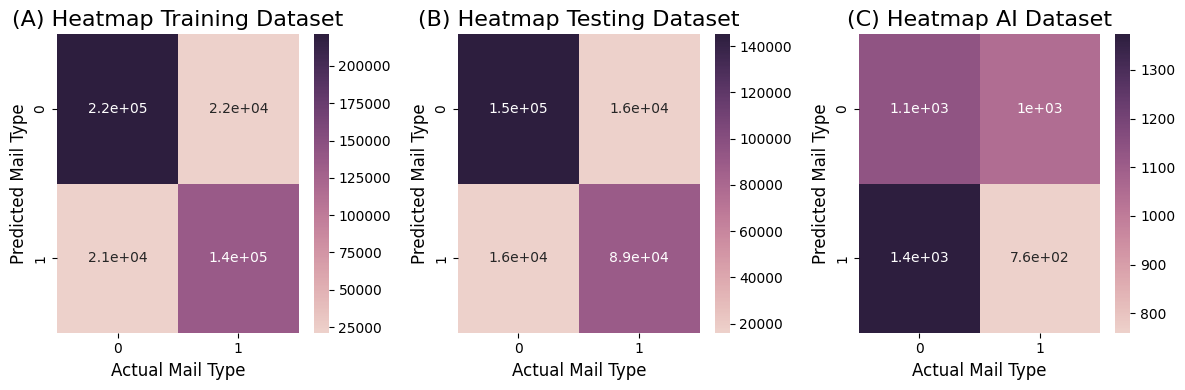

In [ ]:
# Plotting Confusion Matrix on heatmaps side by side
cm1 = confusion_matrix(Y_train, prediction_on_trainingData_SVM)
cm2 = confusion_matrix(Y_test, prediction_on_testingData_SVM)
cm3 = confusion_matrix(YAI_test, prediction_on_testingData_SVM_AI)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.heatmap(cm1.transpose(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, ax=axes[0])
axes[0].set_title('(A) Heatmap Training Dataset', fontsize = 16)
axes[0].set_xlabel('Actual Mail Type', fontsize = 12)
axes[0].set_ylabel('Predicted Mail Type', fontsize = 12)

sns.heatmap(cm2.transpose(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, ax=axes[1])
axes[1].set_title('(B) Heatmap Testing Dataset', fontsize = 16)
axes[1].set_xlabel('Actual Mail Type', fontsize = 12)
axes[1].set_ylabel('Predicted Mail Type', fontsize = 12)

sns.heatmap(cm3.transpose(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, ax=axes[2])
axes[2].set_title('(C) Heatmap AI Dataset', fontsize = 16)
axes[2].set_xlabel('Actual Mail Type', fontsize = 12)
axes[2].set_ylabel('Predicted Mail Type', fontsize = 12)

plt.tight_layout()
plt.show()

In [ ]:
# Print the classification report for the SVM model on the AI testing data
print(classification_report(YAI_test, prediction_on_testingData_SVM_AI,zero_division=0))

              precision    recall  f1-score   support

           0       0.52      0.45      0.48      2511
           1       0.36      0.42      0.39      1809

    accuracy                           0.44      4320
   macro avg       0.44      0.44      0.44      4320
weighted avg       0.45      0.44      0.44      4320



### Logistic Regression model Training with Enron Dataset

In [ ]:
# Train the model
model_LR = LogisticRegression(max_iter=10000, random_state=42, solver = 'lbfgs')
model_LR.fit(x_train_features,Y_train)

# Save the model to file
torch.save(model_LR, f'{dirpath}savedmodels/model_LR')

In [23]:
# Load the saved model and test
model_LR = torch.load(f'{dirpath}savedmodels/model_LR')

#Prediction On Training data
prediction_on_trainingData_LRM = model_LR.predict(x_train_features)
Acuracy_on_Training_prediction_LRM = accuracy_score(Y_train, prediction_on_trainingData_LRM)

# Print Accuracy on training Data and limiting answer to the two desimal point
print(f"Acuracy on Training Data LRM = {format(Acuracy_on_Training_prediction_LRM*100, '.2f')} %")

#Prediction On Testing data
prediction_on_testingData_LRM = model_LR.predict(x_test_features)
Acuracy_on_Testing_prediction_LRM = accuracy_score(Y_test, prediction_on_testingData_LRM)

# Print Accuracy on testing Data
# print(f"Acuracy on Testing Data {Acuracy_on_Testing_prediction * 100} %")
print(f"Acuracy on Testing Data LRM = {format(Acuracy_on_Testing_prediction_LRM*100, '.2f')} %")


#Prediction On Testing data
prediction_on_testingData_LRM_AI = model_LR.predict(XAI_test_features)
Acuracy_on_Testing_prediction_LRM_AI = accuracy_score(YAI_test, prediction_on_testingData_LRM_AI)

# Print Accuracy on testing Data
print(f"Acuracy on AI Generated Mails LRM = {format(Acuracy_on_Testing_prediction_LRM_AI*100, '.2f')} %")

Acuracy on Training Data LRM = 88.85 %
Acuracy on Testing Data LRM = 87.68 %
Acuracy on AI Generated Mails LRM = 45.49 %


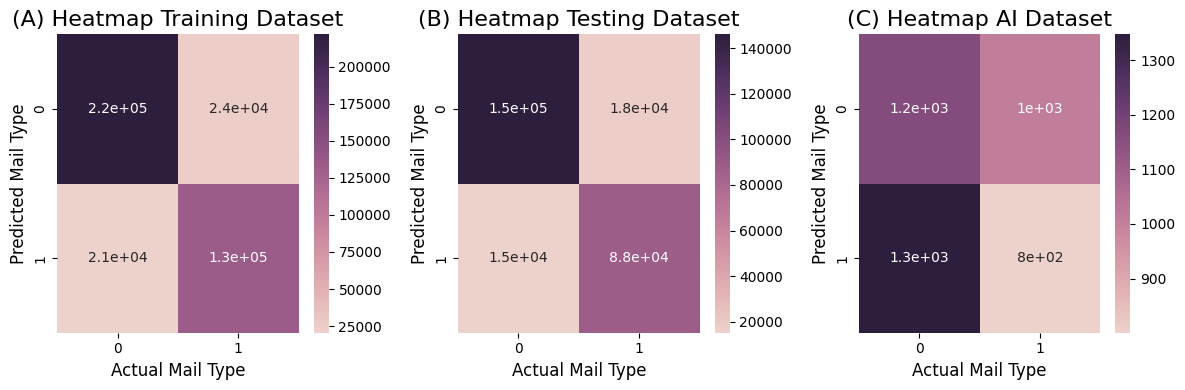

In [ ]:
# Plotting Confusion Matrix on heatmaps side by side
cm1 = confusion_matrix(Y_train, prediction_on_trainingData_LRM)
cm2 = confusion_matrix(Y_test, prediction_on_testingData_LRM)
cm3 = confusion_matrix(YAI_test, prediction_on_testingData_LRM_AI)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.heatmap(cm1.transpose(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, ax=axes[0])
axes[0].set_title('(A) Heatmap Training Dataset', fontsize = 16)
axes[0].set_xlabel('Actual Mail Type', fontsize = 12)
axes[0].set_ylabel('Predicted Mail Type', fontsize = 12)

sns.heatmap(cm2.transpose(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, ax=axes[1])
axes[1].set_title('(B) Heatmap Testing Dataset', fontsize = 16)
axes[1].set_xlabel('Actual Mail Type', fontsize = 12)
axes[1].set_ylabel('Predicted Mail Type', fontsize = 12)

sns.heatmap(cm3.transpose(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, ax=axes[2])
axes[2].set_title('(C) Heatmap AI Dataset', fontsize = 16)
axes[2].set_xlabel('Actual Mail Type', fontsize = 12)
axes[2].set_ylabel('Predicted Mail Type', fontsize = 12)

plt.tight_layout()
plt.show()

In [ ]:
# Print the classification report for the Logistic Regression model on the AI testing data
print(classification_report(YAI_test, prediction_on_testingData_LRM_AI,zero_division=0))

              precision    recall  f1-score   support

           0       0.54      0.46      0.50      2511
           1       0.37      0.44      0.40      1809

    accuracy                           0.45      4320
   macro avg       0.45      0.45      0.45      4320
weighted avg       0.47      0.45      0.46      4320



## Long Short-Term Memory (LSTM)

In [29]:
# Define the required parameters
VOCAB_SIZE = 30000
EMBEDDING_DIM = 16
EPOCHS = 5
MAX_LEN = 32
TRUNC_TYPE = 'post'
PADD_TYPE = 'post'
UNK_TOK = '<UNK>'
TRAINING_SIZE = 1000


In [30]:
# tokenize the data
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=UNK_TOK)
tokenizer.fit_on_texts(X_train.astype(str))
word_index = tokenizer.word_index

Training_Sequences = tokenizer.texts_to_sequences(X_train.astype(str))
Training_pad = pad_sequences(Training_Sequences, maxlen=MAX_LEN, padding=PADD_TYPE, truncating=TRUNC_TYPE)

Testing_Sequences = tokenizer.texts_to_sequences(X_test.astype(str))
Testing_pad = pad_sequences(Testing_Sequences, maxlen=MAX_LEN, padding=PADD_TYPE, truncating=TRUNC_TYPE)

In [ ]:
# Build the model LSTM
model_LSTM = tf.keras.Sequential()
model_LSTM.add(tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model_LSTM.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
model_LSTM.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)))
model_LSTM.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True)))
model_LSTM.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)))
model_LSTM.add(tf.keras.layers.Flatten())
model_LSTM.add(tf.keras.layers.Dense(24, activation='relu'))
model_LSTM.add(tf.keras.layers.Dense(1, activation='sigmoid'))
print(model_LSTM.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 16)            480000    
                                                                 
 bidirectional (Bidirection  (None, 32, 128)           41472     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 32, 64)            41216     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 32, 32)            10368     
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 32)                6272      
 onal)                                                  

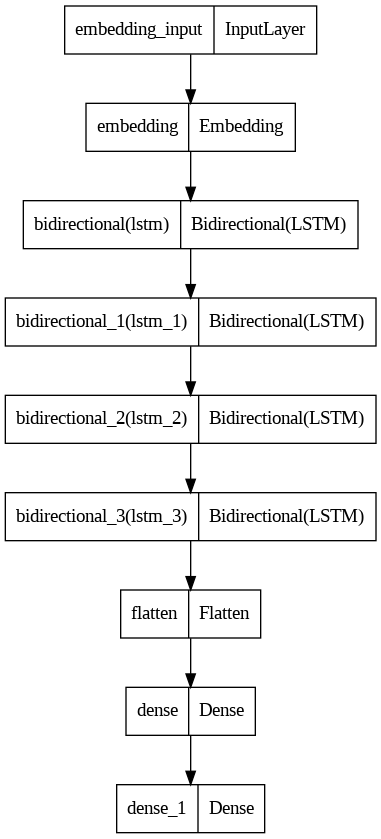

In [ ]:
# Plot the model structure
tf.keras.utils.plot_model(model_LSTM)

In [33]:
# Converto to the numpy arrays
Training_Sequences_padded = np.asarray(Training_pad)
Testing_Sequences_padded = np.asarray(Testing_pad)

In [ ]:
# Compile the model and Train the model
model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
History_LSTM = model_LSTM.fit(Training_Sequences_padded, Y_train, validation_data=(Testing_Sequences_padded, Y_test), epochs=EPOCHS)

# Save the trained model to a file
model_LSTM.save(f'{dirpath}savedmodels/model_LSTM.keras')
# Save history to a file
np.save(f'{dirpath}savedmodels/History_LSTM.npy',History_LSTM.history)

Epoch 1/5
12510/12510 [==============================] - 316s 24ms/step - loss: 0.2260 - accuracy: 0.9000 - val_loss: 0.2393 - val_accuracy: 0.8940
Epoch 2/5
12510/12510 [==============================] - 278s 22ms/step - loss: 0.1991 - accuracy: 0.9122 - val_loss: 0.2326 - val_accuracy: 0.8976
Epoch 3/5
12510/12510 [==============================] - 278s 22ms/step - loss: 0.1802 - accuracy: 0.9211 - val_loss: 0.2318 - val_accuracy: 0.9008
Epoch 4/5
12510/12510 [==============================] - 278s 22ms/step - loss: 0.1658 - accuracy: 0.9278 - val_loss: 0.2315 - val_accuracy: 0.9037
Epoch 5/5
12510/12510 [==============================] - 276s 22ms/step - loss: 0.1535 - accuracy: 0.9329 - val_loss: 0.2328 - val_accuracy: 0.9041


In [25]:
# Load the saved history file
History_LSTM=np.load(f'{dirpath}savedmodels/History_LSTM.npy',allow_pickle='TRUE').item()


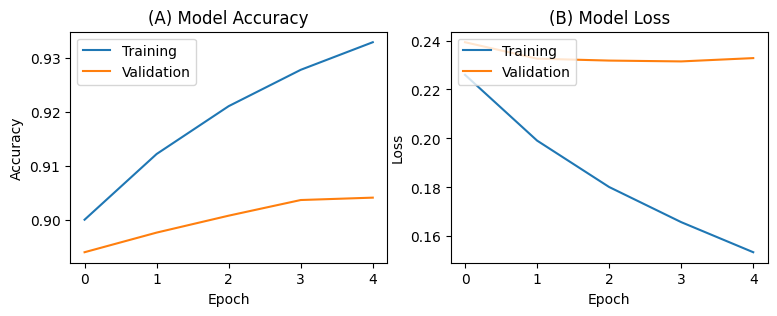

In [26]:
# Plotted the accuracy and loss of the model over the epochs
fig, axes = plt.subplots(1, 2, figsize=(9, 3) )
axes[0].plot(History_LSTM['accuracy'])
axes[0].plot(History_LSTM['val_accuracy'])
axes[0].set_title('(A) Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Training', 'Validation'], loc='upper left')

axes[1].plot(History_LSTM['loss'])
axes[1].plot(History_LSTM['val_loss'])
axes[1].set_title('(B) Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Training', 'Validation'], loc='upper left')

plt.show()

In [31]:
# Load Saved Model LSTM
model_LSTM = tf.keras.models.load_model(f'{dirpath}savedmodels/model_LSTM.keras', custom_objects={'KerasLayer':hub.KerasLayer})

# future_predictions
Testing_Sequences_AI = tokenizer.texts_to_sequences(X_AI.astype(str))
Testing_pad_AI = pad_sequences(Testing_Sequences_AI, maxlen=MAX_LEN, padding=PADD_TYPE, truncating=TRUNC_TYPE)

# Test the model after training
test_results = model_LSTM.evaluate(Testing_pad_AI, YAI_test, verbose=False)


print(f"Acuracy on AI Generated Mails With LSTM = {format(test_results[1]*100, '.2f')} %")


Acuracy on AI Generated Mails With LSTM = 51.00 %


In [34]:
# Print the classification report for the LSTM model on the AI testing data
prediction_on_TrainingData_LSTM = model_LSTM.predict(Training_Sequences_padded, batch_size=200, verbose=2)
prediction_on_TestingData_LSTM = model_LSTM.predict(Testing_Sequences_padded, batch_size=200, verbose=2)
prediction_on_testingData_LSTM_AI = model_LSTM.predict(Testing_pad_AI, batch_size=200, verbose=2)
print(classification_report(YAI_test, prediction_on_testingData_LSTM_AI.round(),zero_division=0))




2002/2002 - 96s - 96s/epoch - 48ms/step
1335/1335 - 61s - 61s/epoch - 46ms/step
22/22 - 1s - 1s/epoch - 47ms/step
              precision    recall  f1-score   support

           0       0.62      0.41      0.49      2511
           1       0.44      0.65      0.52      1809

    accuracy                           0.51      4320
   macro avg       0.53      0.53      0.51      4320
weighted avg       0.54      0.51      0.51      4320



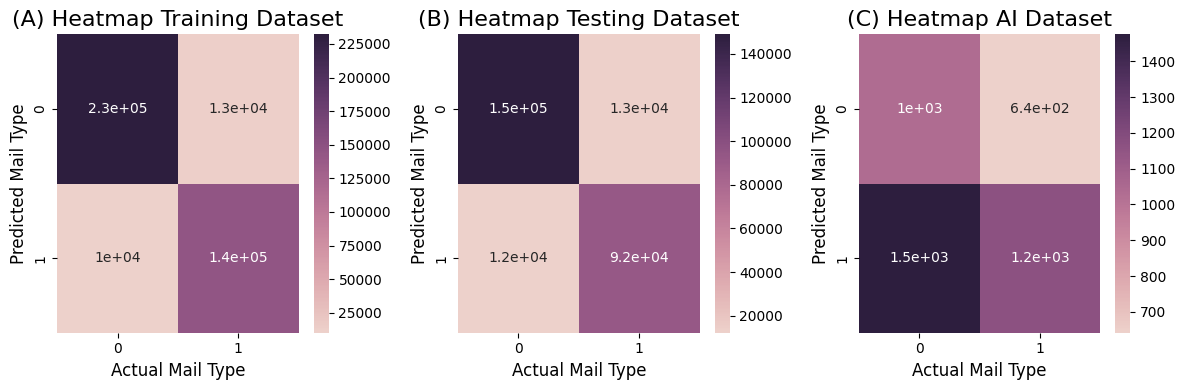

In [ ]:
# Plotting Confusion Matrix on heatmaps side by side
cm1 = confusion_matrix(Y_train, prediction_on_TrainingData_LSTM.round())
cm2 = confusion_matrix(Y_test, prediction_on_TestingData_LSTM.round())
cm3 = confusion_matrix(YAI_test, prediction_on_testingData_LSTM_AI.round())

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.heatmap(cm1.transpose(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, ax=axes[0])
axes[0].set_title('(A) Heatmap Training Dataset', fontsize = 16)
axes[0].set_xlabel('Actual Mail Type', fontsize = 12)
axes[0].set_ylabel('Predicted Mail Type', fontsize = 12)

sns.heatmap(cm2.transpose(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, ax=axes[1])
axes[1].set_title('(B) Heatmap Testing Dataset', fontsize = 16)
axes[1].set_xlabel('Actual Mail Type', fontsize = 12)
axes[1].set_ylabel('Predicted Mail Type', fontsize = 12)

sns.heatmap(cm3.transpose(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, ax=axes[2])
axes[2].set_title('(C) Heatmap AI Dataset', fontsize = 16)
axes[2].set_xlabel('Actual Mail Type', fontsize = 12)
axes[2].set_ylabel('Predicted Mail Type', fontsize = 12)

plt.tight_layout()
plt.show()

## Bidirectional Encoder Representations from Transformers (BERT)

In [ ]:
#  Download Preprocess BERT 
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1")


In [ ]:
# Define the BERT model
#Text input passed to bert_preprocess
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)

#Processed text passed to bert_encoder
outputs = bert_encoder(preprocessed_text)

# Neural network layers
#Adding one Dropout Layer and one Dense Layer
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model_BERT = tf.keras.Model(inputs=[text_input], outputs = [l])
model_BERT.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer_2 (KerasLayer)  {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                            

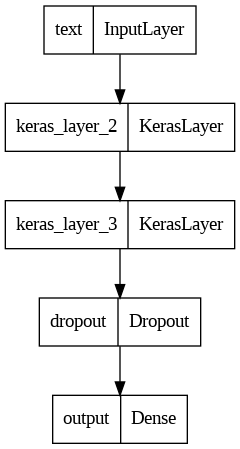

In [ ]:
# Plot the BERT model structure
tf.keras.utils.plot_model(model_BERT)

In [ ]:
# Compile the BERT model
METRICS = [tf.keras.metrics.BinaryAccuracy(name='accuracy'),tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')]

model_BERT.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS)

In [ ]:
# Train the BERT model
History_BERT = model_BERT.fit(X_train.astype(str), Y_train.astype(int), validation_data =(X_test.astype(str),Y_test.astype(int)), epochs=5, batch_size=32)

# Save the training history to a file
np.save(f'{dirpath}savedmodels/History_BERT.npy',History_BERT.history)

# Save the trained model to a file
model_BERT.save(f'{dirpath}savedmodels/model_BERT.keras')


Epoch 1/5
12510/12510 [==============================] - 1188s 95ms/step - loss: 0.5478 - accuracy: 0.7157 - precision: 0.6636 - recall: 0.5671 - val_loss: 0.5280 - val_accuracy: 0.7286 - val_precision: 0.7186 - val_recall: 0.5170
Epoch 2/5
12510/12510 [==============================] - 1173s 94ms/step - loss: 0.5470 - accuracy: 0.7160 - precision: 0.6641 - recall: 0.5674 - val_loss: 0.5288 - val_accuracy: 0.7255 - val_precision: 0.7210 - val_recall: 0.5003
Epoch 3/5
12510/12510 [==============================] - 1153s 92ms/step - loss: 0.5468 - accuracy: 0.7164 - precision: 0.6642 - recall: 0.5690 - val_loss: 0.5292 - val_accuracy: 0.7292 - val_precision: 0.7098 - val_recall: 0.5345
Epoch 4/5
12510/12510 [==============================] - 1150s 92ms/step - loss: 0.5469 - accuracy: 0.7166 - precision: 0.6650 - recall: 0.5680 - val_loss: 0.5260 - val_accuracy: 0.7304 - val_precision: 0.6996 - val_recall: 0.5592
Epoch 5/5
12510/12510 [==============================] - 1146s 92ms/step - l

In [17]:
# Load the saved BERT model
model_BERT = tf.keras.models.load_model(f'{dirpath}savedmodels/model_BERT.keras', custom_objects={'KerasLayer':hub.KerasLayer})

X_AI = np.array([np.array(val) for val in X_AI])
Y_AI = np.array([np.array(val) for val in Y_AI])

# Test the model after training
BERT_results = model_BERT.evaluate(X_AI, Y_AI, verbose=1)
# Test the model after training
print(f"Acuracy on AI Generated Mails BERT = {format(BERT_results[1]*100, '.2f')} %")

135/135 [==============================] - 238s 2s/step - loss: 0.8739 - accuracy: 0.4484 - precision: 0.3787 - recall: 0.4953
Acuracy on AI Generated Mails BERT = 44.84 %


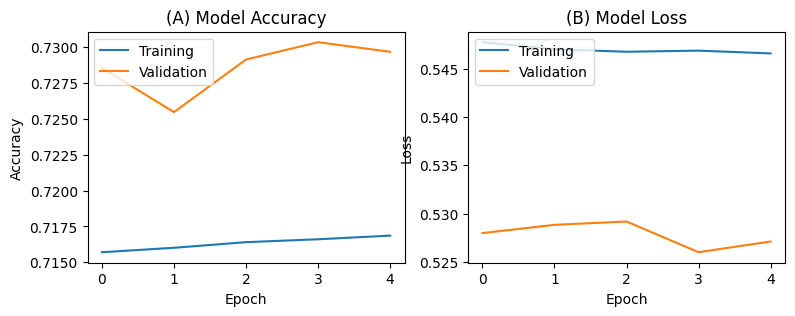

In [18]:
# Plotted the accuracy and loss of the model over the epochs
History_BERT=np.load(f'{dirpath}savedmodels/History_BERT.npy',allow_pickle='TRUE').item()
fig, axes = plt.subplots(1, 2, figsize=(9, 3) )
axes[0].plot(History_BERT['accuracy'])
axes[0].plot(History_BERT['val_accuracy'])
axes[0].set_title('(A) Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Training', 'Validation'], loc='upper left')

axes[1].plot(History_BERT['loss'])
axes[1].plot(History_BERT['val_loss'])
axes[1].set_title('(B) Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [20]:
# Print the classification report for the LSTM model on the AI testing data
model_BERT = tf.keras.models.load_model(f'{dirpath}savedmodels/model_BERT.keras', custom_objects={'KerasLayer':hub.KerasLayer})
prediction_on_TrainingData_BERT = model_BERT.predict(X_train.astype(str), batch_size=200, verbose=2)
prediction_on_TestingData_BERT = model_BERT.predict(X_test.astype(str), batch_size=200, verbose=2)
prediction_on_testingData_BERT_AI = model_BERT.predict(X_AI, batch_size=200, verbose=2)

print(classification_report(YAI_test, prediction_on_testingData_BERT_AI.round(),zero_division=0))

              precision    recall  f1-score   support

           0       0.53      0.41      0.47      2511
           1       0.38      0.50      0.43      1809

    accuracy                           0.45      4320
   macro avg       0.46      0.45      0.45      4320
weighted avg       0.47      0.45      0.45      4320



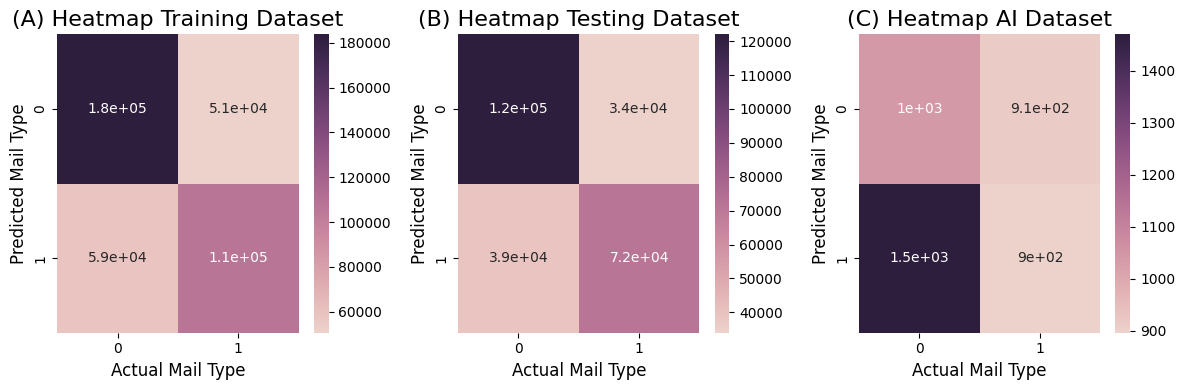

In [ ]:
# Plotting Confusion Matrix on heatmaps side by side
cm1 = confusion_matrix(Y_train, prediction_on_TrainingData_BERT.round())
cm2 = confusion_matrix(Y_test, prediction_on_TestingData_BERT.round())
cm3 = confusion_matrix(YAI_test, prediction_on_testingData_BERT_AI.round())

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.heatmap(cm1.transpose(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, ax=axes[0])
axes[0].set_title('(A) Heatmap Training Dataset', fontsize = 16)
axes[0].set_xlabel('Actual Mail Type', fontsize = 12)
axes[0].set_ylabel('Predicted Mail Type', fontsize = 12)

sns.heatmap(cm2.transpose(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, ax=axes[1])
axes[1].set_title('(B) Heatmap Testing Dataset', fontsize = 16)
axes[1].set_xlabel('Actual Mail Type', fontsize = 12)
axes[1].set_ylabel('Predicted Mail Type', fontsize = 12)

sns.heatmap(cm3.transpose(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True, ax=axes[2])
axes[2].set_title('(C) Heatmap AI Dataset', fontsize = 16)
axes[2].set_xlabel('Actual Mail Type', fontsize = 12)
axes[2].set_ylabel('Predicted Mail Type', fontsize = 12)

plt.tight_layout()
plt.show()